In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import algo
import json

2023-01-19 13:46:39.030327: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [159]:
path = 'tm'
tms_params = {}
tms = {}
for r,d,f in os.walk(path):
    for file in f:
        if "_params.json" in file:
            with open(path+'/'+file) as json_file:
                tms[file] = json.load(json_file)
            

In [160]:
df = pd.DataFrame.from_dict(tms, orient='index')
# df = df.loc[df['max_iter']==100].loc[df['n_classes']==100].loc[df['alpha']==0.001].loc[df['lambda_']==0.00001].loc[df['tolerance']==0.00001].loc[df['C']==1].loc[df['delta']==0.00001]        
df.shape

(683, 18)

In [161]:
a = df.loc[df['DP']==True].loc[df['test_acc']>0.5].sort_values(by=['test_acc'], ascending=False)
a

,n_classes,alpha,max_iter,lambda_,tolerance,DP,L,C,epsilon,delta,train_acc,test_acc,attack_acc_mean,attack_acc_std,attack_pre_mean,attack_pre_std,attack_rec_mean,attack_rec_std
rs42_lr0.01_iter500_reg0.0001_DPTrue_eps1000000_L50_C3_target_model_params.json,100,0.01,500,0.00010,0.00001,True,50,3.0,1000000.0,0.00001,0.9239,0.5422,0.651525,0.004158,0.596062,0.003200,0.940383,0.007048
rs42_lr0.01_iter500_reg0.0001_DPTrue_eps1000000_L50_C2.5_target_model_params.json,100,0.01,500,0.00010,0.00001,True,50,2.5,1000000.0,0.00001,0.9065,0.5417,0.654400,0.003761,0.600006,0.002931,0.926500,0.008284
rs42_lr0.01_iter1000_reg0.0001_DPTrue_eps1000000_L50_C2_target_model_params.json,100,0.01,1000,0.00010,0.00001,True,50,2.0,1000000.0,0.00001,0.9424,0.5416,0.649383,0.004812,0.592689,0.003803,0.955517,0.006224
rs42_lr0.01_iter500_reg0.0001_DPTrue_eps1000000_L40_C2_target_model_params.json,100,0.01,500,0.00010,0.00001,True,40,2.0,1000000.0,0.00001,0.9023,0.5405,0.651492,0.004232,0.598287,0.003278,0.922317,0.007984
rs42_lr0.01_iter700_reg0.0001_DPTrue_eps1000000_L50_C2_target_model_params.json,100,0.01,700,0.00010,0.00001,True,50,2.0,1000000.0,0.00001,0.9141,0.5402,0.650375,0.004264,0.595953,0.003319,0.934150,0.006663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rs42_lr0.01_iter300_reg1e-05_DPTrue_eps1000000_L10_C0.9_target_model_params.json,100,0.01,300,0.00001,0.00001,True,10,0.9,1000000.0,0.00001,0.8653,0.5081,0.645917,0.004532,0.596334,0.003579,0.903450,0.006677
rs42_lr0.01_iter300_reg0.0001_DPTrue_eps1000000_L50_C2_target_model_params.json,100,0.01,300,0.00010,0.00001,True,50,2.0,1000000.0,0.00001,0.8047,0.5078,0.662183,0.008942,0.641216,0.008881,0.736883,0.017234
rs42_lr0.01_iter500_reg0.0001_DPTrue_eps1000000_L30_C5_target_model_params.json,100,0.01,500,0.00010,0.00001,True,30,5.0,1000000.0,0.00001,0.9809,0.5061,0.667492,0.006785,0.603514,0.005556,0.977100,0.007119
rs42_lr0.01_iter300_reg1e-05_DPTrue_eps1000000_L30_C1.1_target_model_params.json,100,0.01,300,0.00001,0.00001,True,30,1.1,1000000.0,0.00001,0.7891,0.5034,0.657108,0.010068,0.646830,0.009958,0.692483,0.019736


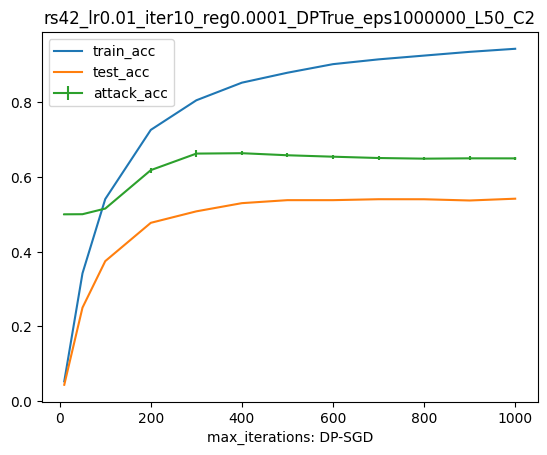

In [97]:
#plot with different iterations number
a = df.loc[df['DP']==True].loc[df['L']==50].loc[df['alpha']==0.01].loc[df['lambda_']==0.0001].loc[df['epsilon']==1000000].loc[df['C']==2].sort_values(by=['max_iter'], ascending=True)
path = 'figures/interesting_results/'

plt.plot(a['max_iter'], a['train_acc'], label='train_acc')
plt.plot(a['max_iter'], a['test_acc'], label='test_acc')
plt.errorbar(a['max_iter'], a['attack_acc_mean'], a['attack_acc_std'], label='attack_acc')
# plt.errorbar(a['max_iter'], a['attack_pre_mean'], a['attack_pre_std'], label='attack_pre')
# plt.errorbar(a['max_iter'], a['attack_rec_mean'], a['attack_rec_std'], label='attack_rec')
plt.title(a.index[0][:a.index[0].find('_target')])
plt.legend()
# plt.xscale('log')
plt.xlabel('max_iterations: DP-SGD')
plt.savefig('figures/interesting_results/iterations_centralized_dpSGD')
plt.show()


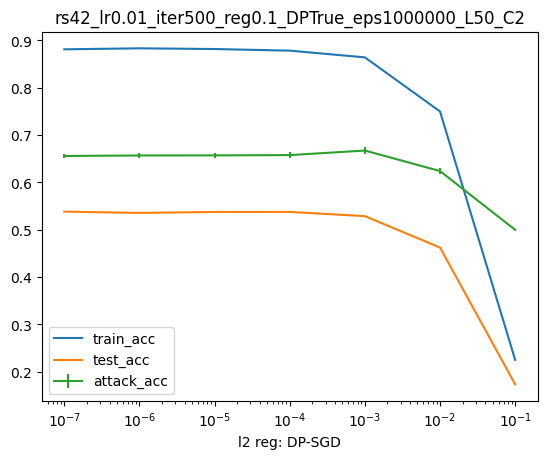

In [132]:
#plot with different regularization lambda
a = df.loc[df['DP']==True].loc[df['epsilon']==1000000].loc[df['max_iter']==500].loc[df['L']==50].loc[df['alpha']==0.01].loc[df['test_acc']>0].loc[df['C']==2].sort_values(by=['lambda_'], ascending=False)

path = 'figures/interesting_results/'

plt.plot(a['lambda_'], a['train_acc'], label='train_acc')
plt.plot(a['lambda_'], a['test_acc'], label='test_acc')
plt.errorbar(a['lambda_'], a['attack_acc_mean'], a['attack_acc_std'], label='attack_acc')
# plt.errorbar(a['epsilon'], a['attack_pre_mean'], a['attack_pre_std'], label='attack_pre')
# plt.errorbar(a['epsilon'], a['attack_rec_mean'], a['attack_rec_std'], label='attack_rec')
plt.title(a.index[0][:a.index[0].find('_target')])
plt.legend()
plt.xscale('log')
plt.xlabel('l2 reg: DP-SGD')
plt.savefig('figures/interesting_results/regularization_centralized_dpSGD')
plt.show()


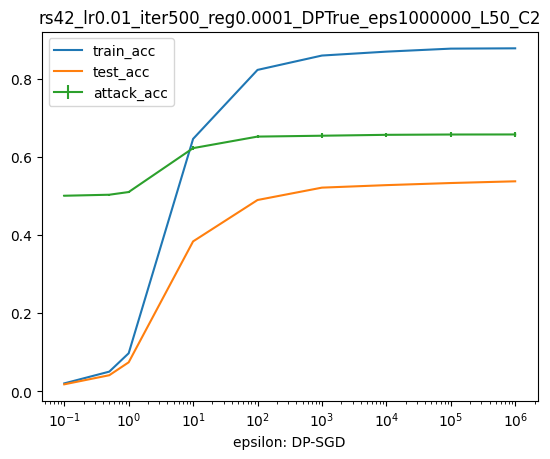

In [23]:
a = df.loc[df['DP']==True].loc[df['max_iter']==500].loc[df['lambda_']==0.0001].loc[df['L']==50].loc[df['alpha']==0.01].loc[df['test_acc']>0].loc[df['C']==2].sort_values(by=['epsilon'], ascending=False)

path = 'figures/interesting_results/'

plt.plot(a['epsilon'], a['train_acc'], label='train_acc')
plt.plot(a['epsilon'], a['test_acc'], label='test_acc')
plt.errorbar(a['epsilon'], a['attack_acc_mean'], a['attack_acc_std'], label='attack_acc')
# plt.errorbar(a['epsilon'], a['attack_pre_mean'], a['attack_pre_std'], label='attack_pre')
# plt.errorbar(a['epsilon'], a['attack_rec_mean'], a['attack_rec_std'], label='attack_rec')
plt.title(a.index[0][:a.index[0].find('_target')])
plt.legend()
plt.xscale('log')
plt.xlabel('epsilon: DP-SGD')
plt.savefig('figures/interesting_results/epsilon_centralized_dpSGD')
plt.show()


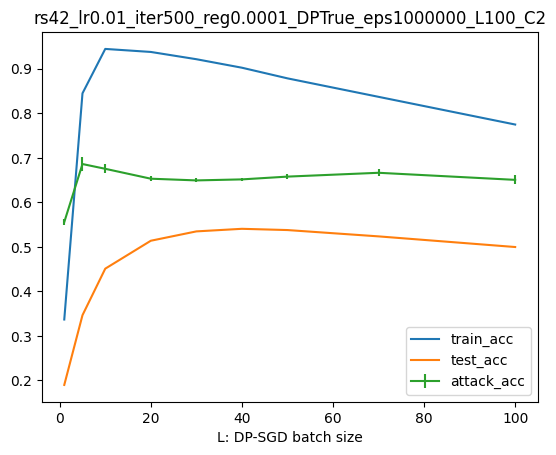

In [27]:
a = df.loc[df['DP']==True].loc[df['max_iter']==500].loc[df['lambda_']==0.0001].loc[df['alpha']==0.01].loc[df['test_acc']>0].loc[df['C']==2].loc[df['epsilon']==1000000].sort_values(by=['L'], ascending=False)
path = 'figures/interesting_results/'

plt.plot(a['L'], a['train_acc'], label='train_acc')
plt.plot(a['L'], a['test_acc'], label='test_acc')
plt.errorbar(a['L'], a['attack_acc_mean'], a['attack_acc_std'], label='attack_acc')
# plt.errorbar(a['L'], a['attack_pre_mean'], a['attack_pre_std'], label='attack_pre')
# plt.errorbar(a['L'], a['attack_rec_mean'], a['attack_rec_std'], label='attack_rec')
plt.title(a.index[0][:a.index[0].find('_target')])
plt.legend()
plt.xlabel('L: DP-SGD batch size')
plt.savefig('figures/interesting_results/batch_size_centralized_dpSGD')
plt.show()


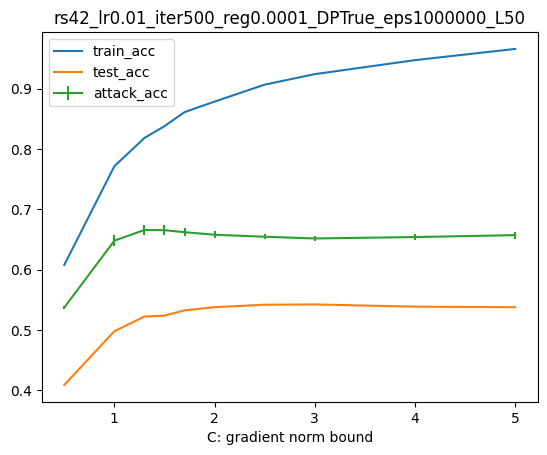

In [52]:
path = 'figures/interesting_results/'
a = df.loc[df['DP']==True].loc[df['max_iter']==500].loc[df['test_acc']>0].loc[df['epsilon']==1000000].loc[df['L']==50].loc[df['lambda_']==0.0001].sort_values(by=['C'], ascending=False)

plt.plot(a['C'], a['train_acc'], label='train_acc')
plt.plot(a['C'], a['test_acc'], label='test_acc')
plt.errorbar(a['C'], a['attack_acc_mean'], a['attack_acc_std'], label='attack_acc')
# plt.errorbar(a['C'], a['attack_pre_mean'], a['attack_pre_std'], label='attack_pre')
# plt.errorbar(a['C'], a['attack_rec_mean'], a['attack_rec_std'], label='attack_rec')

plt.title(a.index[0][:a.index[0].find('_C')])
plt.legend()
plt.xlabel('C: gradient norm bound')
plt.savefig('figures/interesting_results/norm_boud_centralized_dpSGD')
plt.show()


In [100]:
mean_results = pd.DataFrame(columns = baseline.drop(['train_acc','test_acc'], axis=1).columns)
new_df = baseline.drop(['train_acc','test_acc'], axis=1).iloc[0]
new_df['train_acc_mean'] = baseline['train_acc'].mean()
new_df['train_acc_std'] = baseline['train_acc'].std()
new_df['test_acc_mean'] = baseline['test_acc'].mean()
new_df['test_acc_std'] = baseline['test_acc'].std()
mean_results = mean_results.append(new_df)

/var/folders/66/0p0lnj8d6zj532q0yvm1zt580000gn/T/ipykernel_40394/719633128.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_results = mean_results.append(new_df)


In [167]:
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", 
          "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", 
          "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5", "#c49c94"]


# FL

In [226]:
path = 'fl/'
params = {}
results = {}
models = {}
for r,d,f in os.walk(path):
    for file in f:
        if "params.json" in file:
            with open(r+'/'+file) as json_file:
                params[r] = json.load(json_file)
        elif "results.csv" in file:
            results[r] = pd.read_csv(r+'/'+file)
            it = []
            client = []
            model_filenames = []
            if 'Unnamed: 0' in results[r].keys():
                for k in results[r]['Unnamed: 0']:
                    it.append(k[k.find('i')+1:k.find('_')])
                    client.append(k[k.find('_')+1:])
                    model_filenames.append(k+'.npy')
                results[r]['it'] = it
                results[r]['client'] = client
                results[r]['file_name'] = model_filenames
                results[r].pop('Unnamed: 0')
        elif '.npy' in file:
            if r not in models:
                models[r] = {}
            models[r][file] = np.load(r+'/'+file)



fl/rs42_ncl2_fiter5_lr0.001_iter5_reg0.0001
test_acc: 0.5524
attack_acc: 14    0.688392
Name: attack_acc_mean, dtype: float64
fl/rs42_ncl2_fiter5_lr0.01_iter10_reg0.0001
test_acc: 0.5428
attack_acc: 2    0.6639
Name: attack_acc_mean, dtype: float64
fl/rs42_ncl2_fiter5_lr0.001_iter50_reg0.0001
test_acc: 0.5622
attack_acc: 2    0.678392
Name: attack_acc_mean, dtype: float64
fl/rs42_ncl2_fiter5_lr0.001_iter100_reg0.0001
test_acc: 0.5543
attack_acc: 2    0.667983
Name: attack_acc_mean, dtype: float64
fl/rs42_ncl2_fiter5_lr0.001_iter50_reg1e-05
test_acc: 0.5628
attack_acc: 2    0.67705
Name: attack_acc_mean, dtype: float64
fl/rs42_ncl2_fiter5_lr0.01_iter10_reg1e-05
test_acc: 0.5444
attack_acc: 2    0.66215
Name: attack_acc_mean, dtype: float64
fl/rs42_ncl2_fiter5_lr0.01_iter5_reg1e-05
test_acc: 0.5469
attack_acc: 5    0.663058
Name: attack_acc_mean, dtype: float64
fl/rs42_ncl2_fiter5_lr0.01_iter5_reg0.0001
test_acc: 0.5442
attack_acc: 5    0.664642
Name: attack_acc_mean, dtype: float64
fl/r

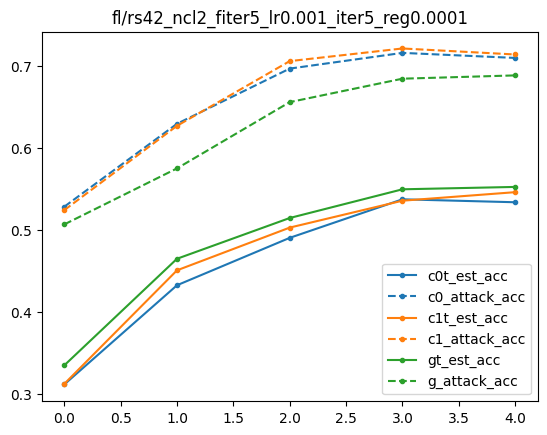

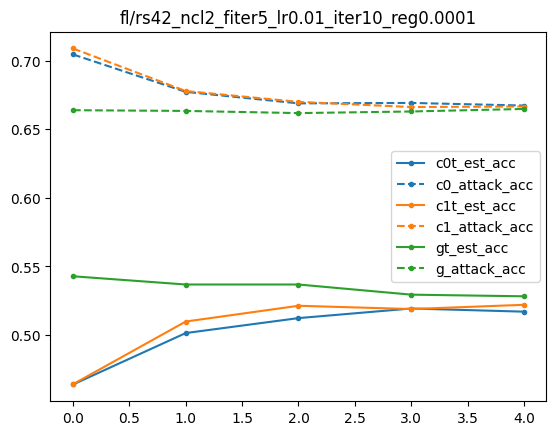

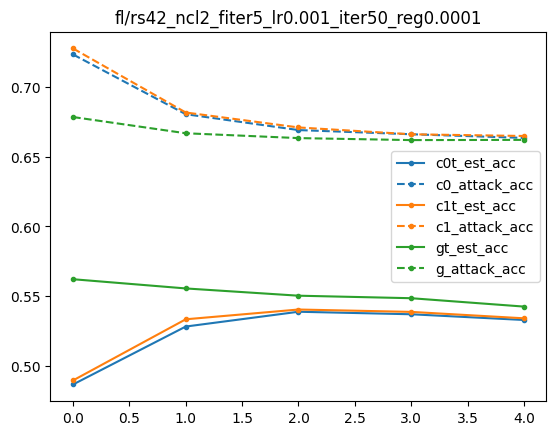

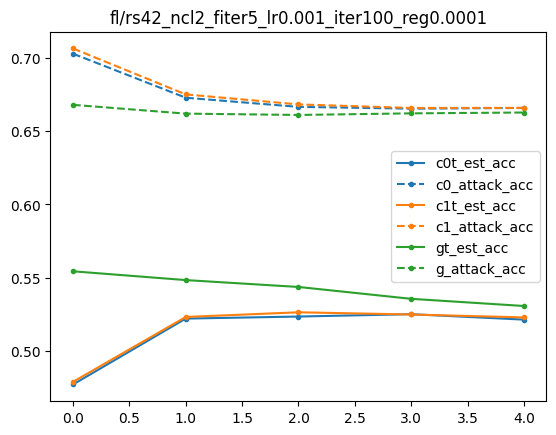

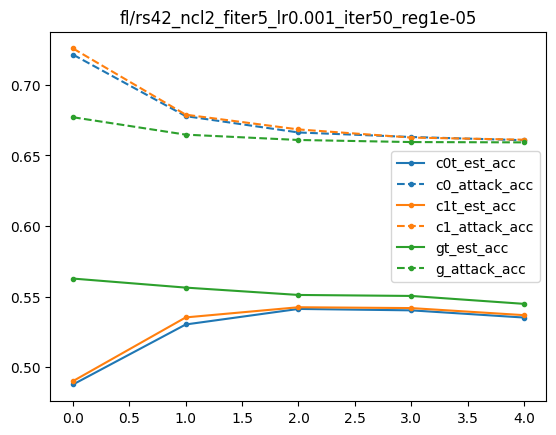

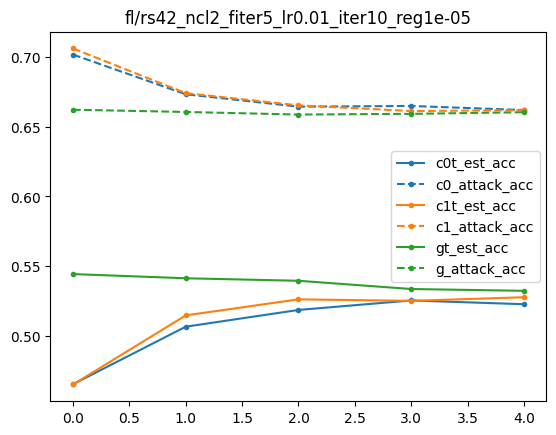

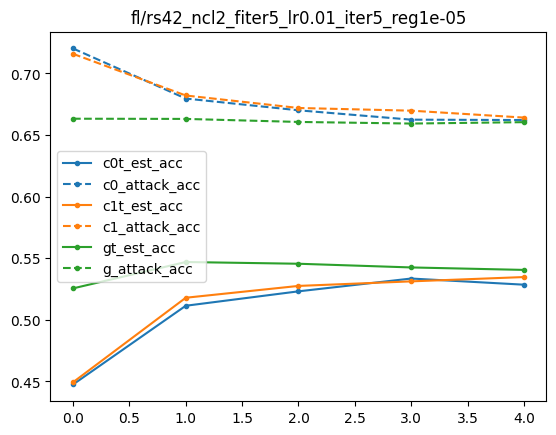

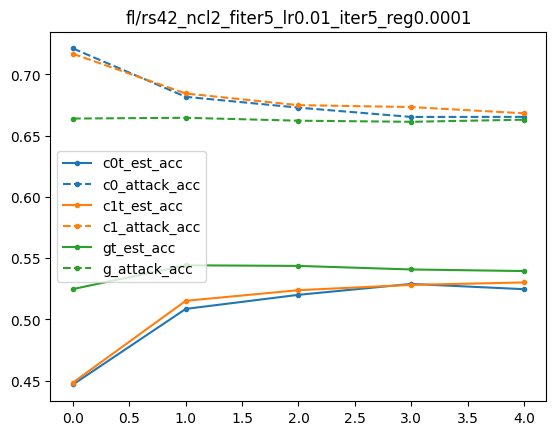

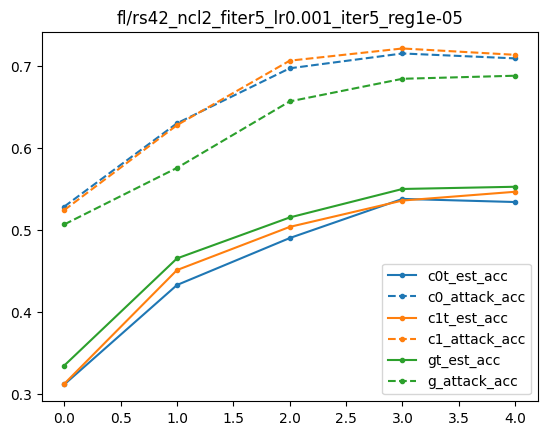

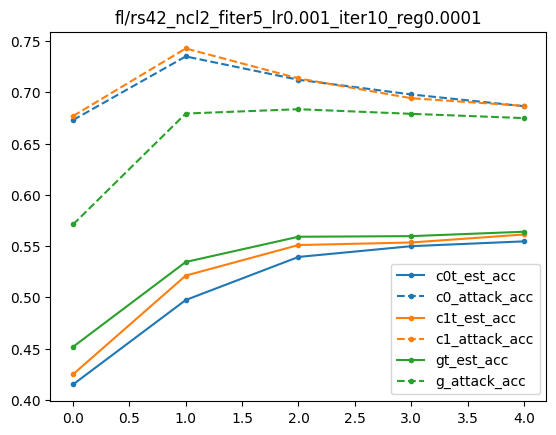

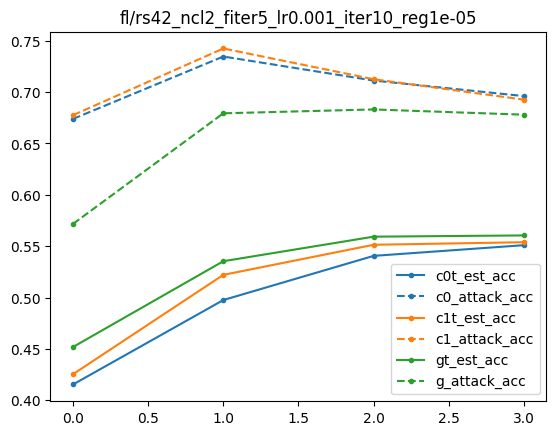

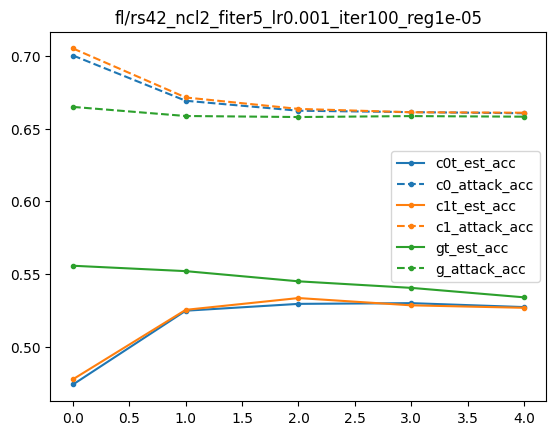

In [215]:
for i in results:
    if '_ncl2_' not in i:
        continue
    if 'sgdDPTrue' in i or 'outDPlocalTrue' in i:
        continue
    
    m = max(results[i].loc[results[i]['client']=='g']['test_acc'])
    if m>0.54:
        print(i)
        print('test_acc:', m)
        am = results[i].loc[results[i]['client']=='g'].loc[results[i]['test_acc']==m]['attack_acc_mean']
        print('attack_acc:', am)
#         print(results[i])
        clients = results[i]['client'].unique()
        iterations = results[i]['it'].unique()
        plt.figure()
        plt.title(i)
        for j,c in enumerate(clients):
    #         print(iterations)
            plt.plot([int(i) for i in iterations], results[i].loc[results[i]['client']==c]['test_acc'], '.-',label=c+'t_est_acc', color=colors[j])
            plt.plot([int(i) for i in iterations], results[i].loc[results[i]['client']==c]['attack_acc_mean'], '.--', label=c+'_attack_acc', color=colors[j])
        plt.legend()
        name = i.replace('fl/', '')
        plt.savefig(f'figures/fl/noDP/{name}.png')
#         results[i].to_csv(f'figures/fl/noDP/{name}.csv')

    #     break

fl/rs42_ncl2_fiter5_lr0.001_iter10_reg0.0001_sgdDPTrue_eps1000000_L10_C1
0.0244
fl/rs42_ncl2_fiter5_lr0.01_iter10_reg1e-05_sgdDPTrue_eps1000000_L20_C2
0.2795
fl/rs42_ncl2_fiter5_lr0.01_iter1_reg1e-05_sgdDPTrue_eps1000000_L20_C2
0.0374
fl/rs42_ncl2_fiter5_lr0.01_iter50_reg0.0001_sgdDPTrue_eps1000000_L20_C2
0.5139
fl/rs42_ncl2_fiter5_lr0.001_iter5_reg0.0001_sgdDPTrue_eps1000000_L10_C2
0.0241
fl/rs42_ncl2_fiter5_lr0.001_iter1_reg0.0001_sgdDPTrue_eps1000000_L20_C2
0.0225
fl/rs42_ncl2_fiter5_lr0.01_iter50_reg0.0001_sgdDPTrue_eps1000000_L10_C2
0.5252
fl/rs42_ncl2_fiter5_lr0.001_iter5_reg0.0001_sgdDPTrue_eps1000000_L20_C2
0.0225
fl/rs42_ncl2_fiter5_lr0.001_iter1_reg0.0001_sgdDPTrue_eps1000000_L10_C2
0.0225
fl/rs42_ncl2_fiter5_lr0.001_iter50_reg0.0001_sgdDPTrue_eps1000000_L10_C2
0.2783
fl/rs42_ncl2_fiter5_lr0.001_iter1_reg1e-05_sgdDPTrue_eps1000000_L20_C2
0.0225
fl/rs42_ncl2_fiter5_lr0.01_iter5_reg0.0001_sgdDPTrue_eps1000000_L10_C2
0.2712
fl/rs42_ncl2_fiter5_lr0.01_iter1_reg0.0001_sgdDPTrue_ep

/var/folders/66/0p0lnj8d6zj532q0yvm1zt580000gn/T/ipykernel_46776/3932987311.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


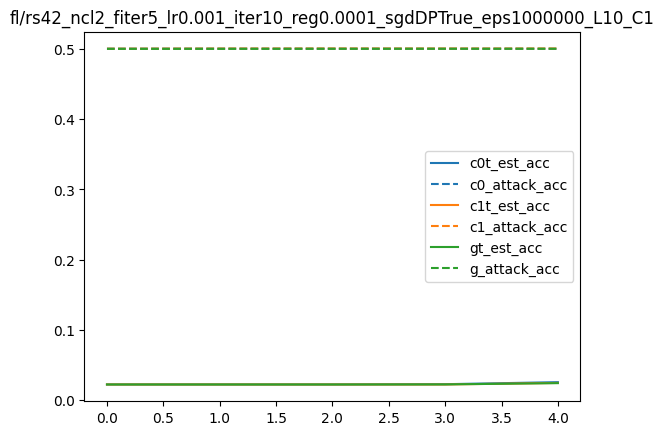

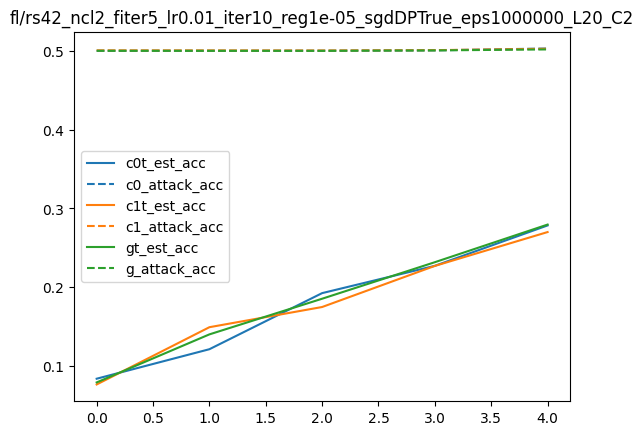

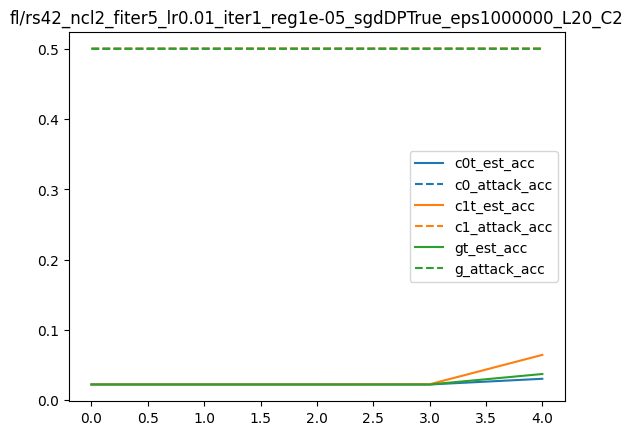

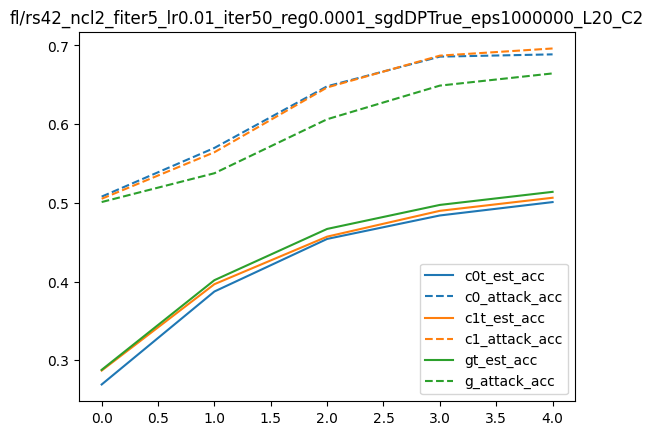

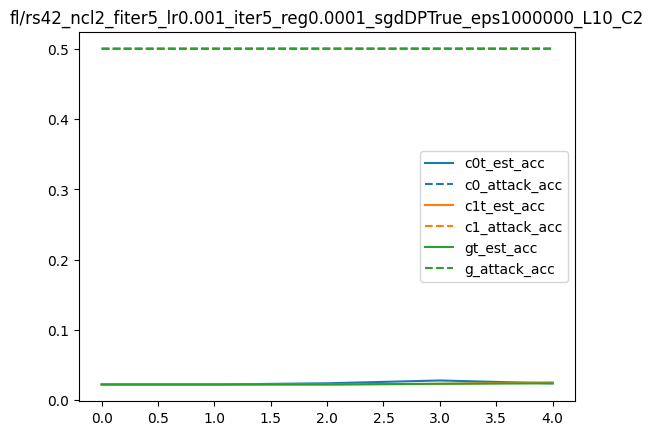

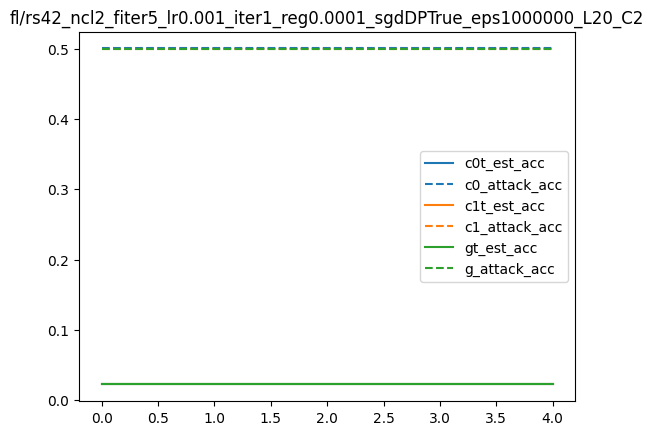

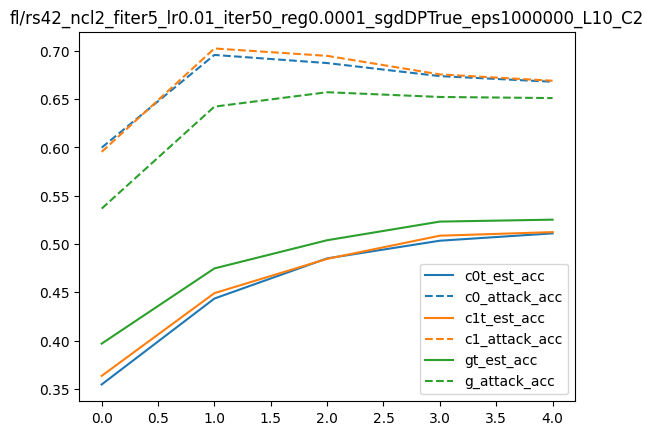

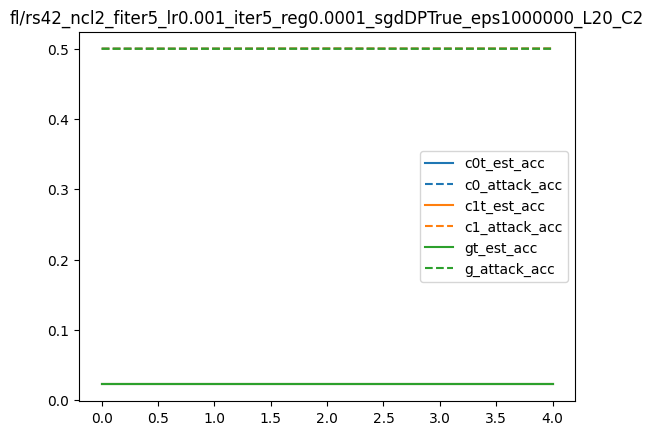

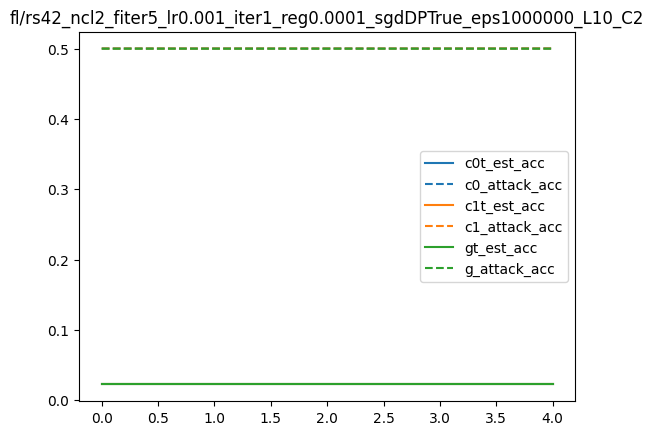

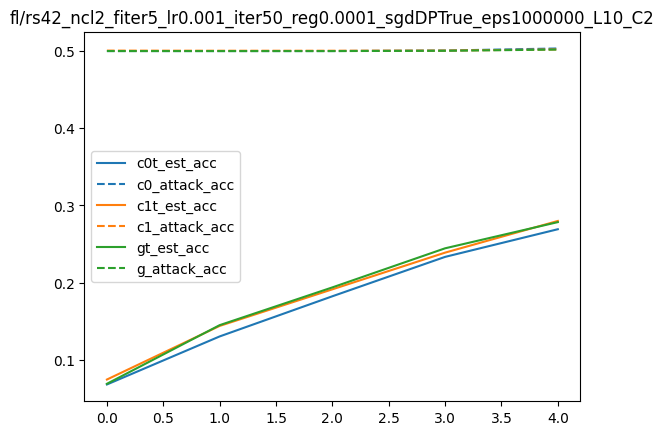

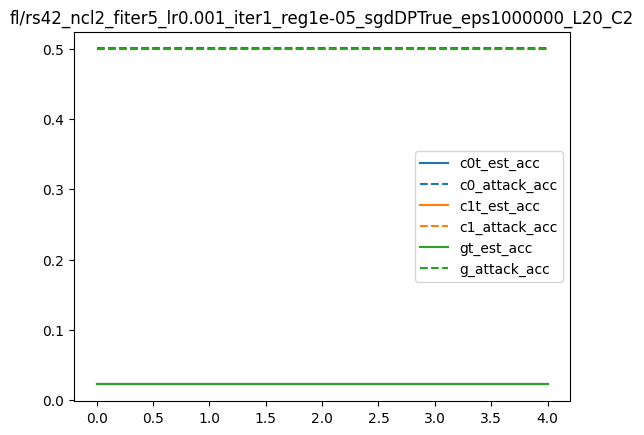

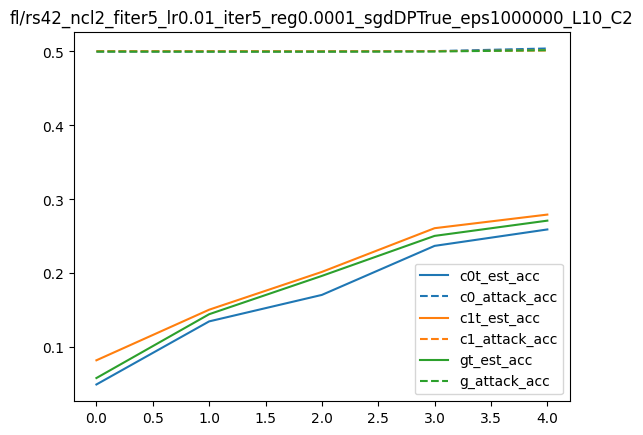

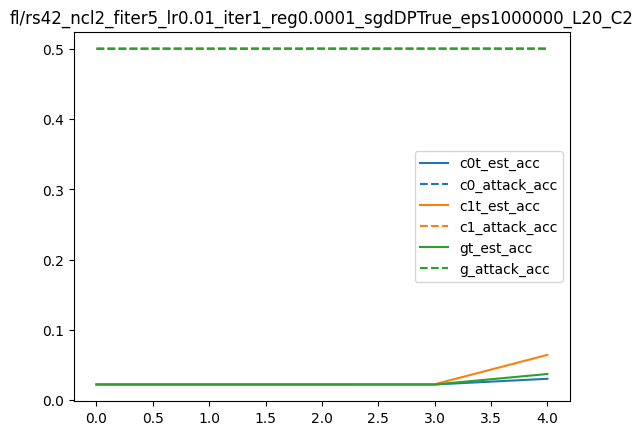

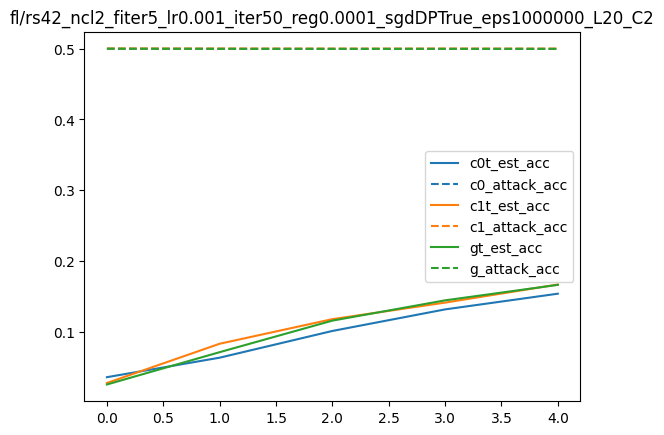

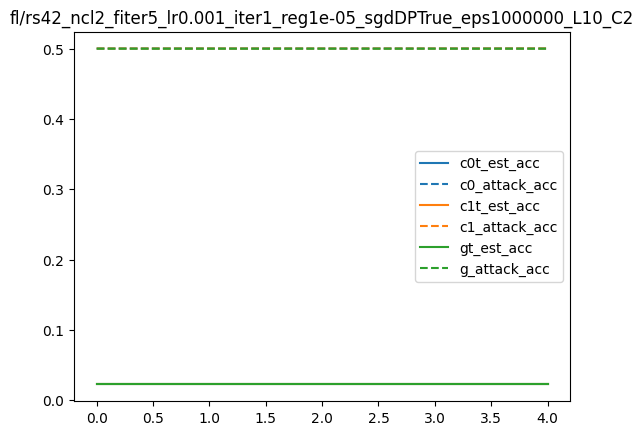

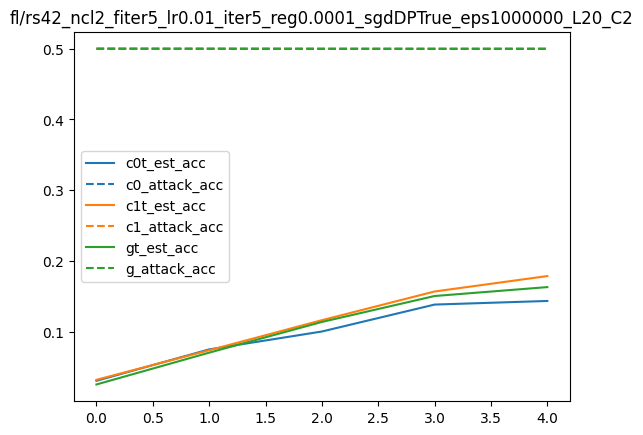

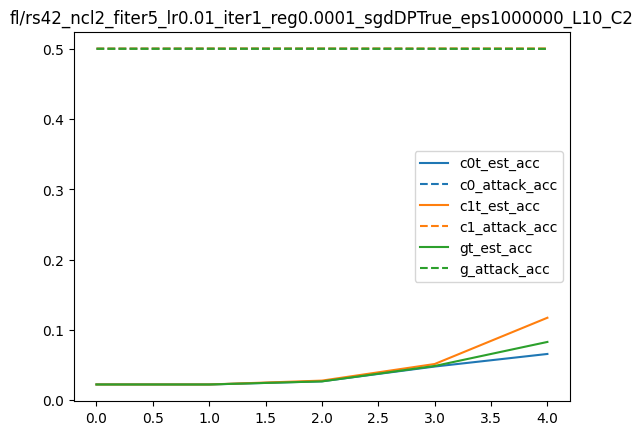

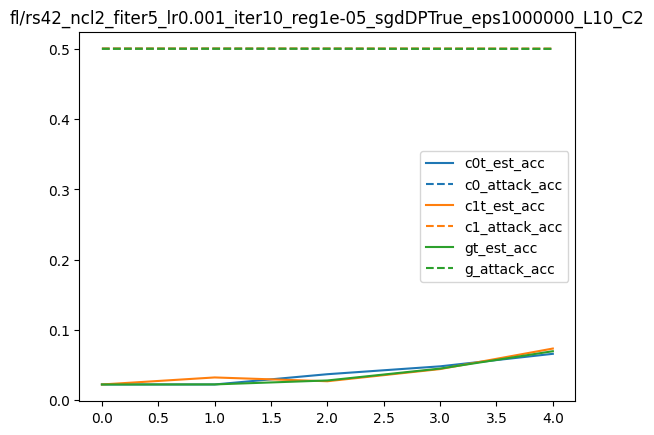

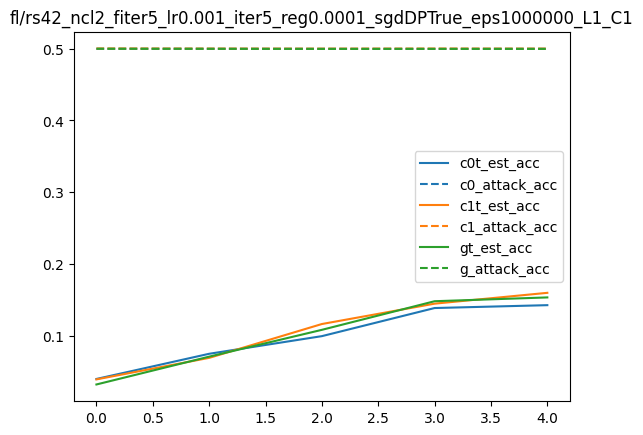

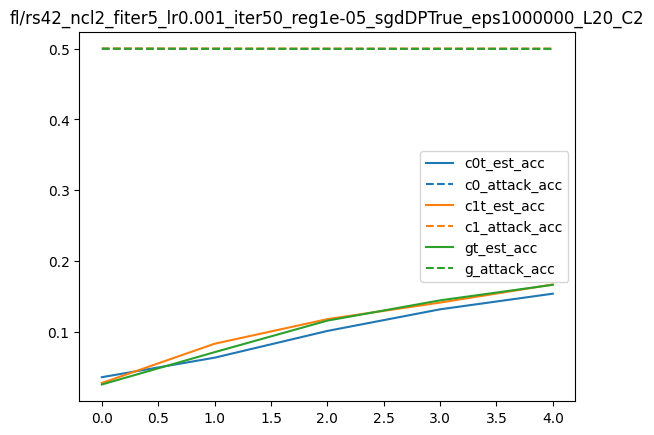

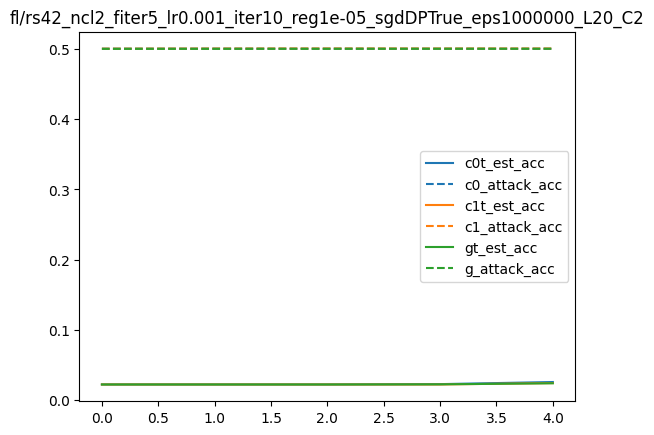

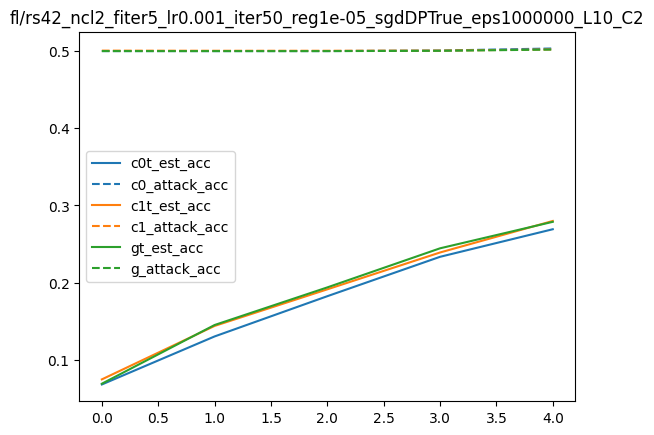

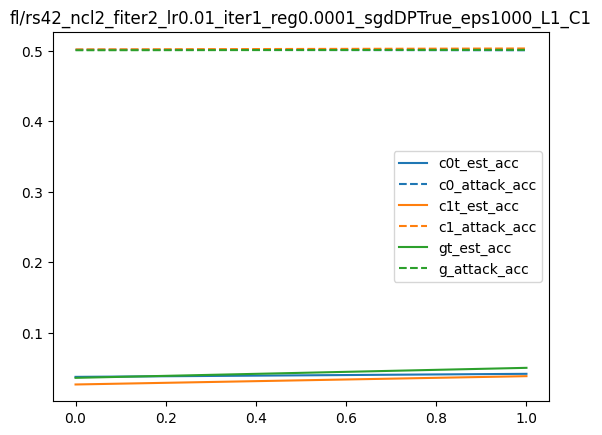

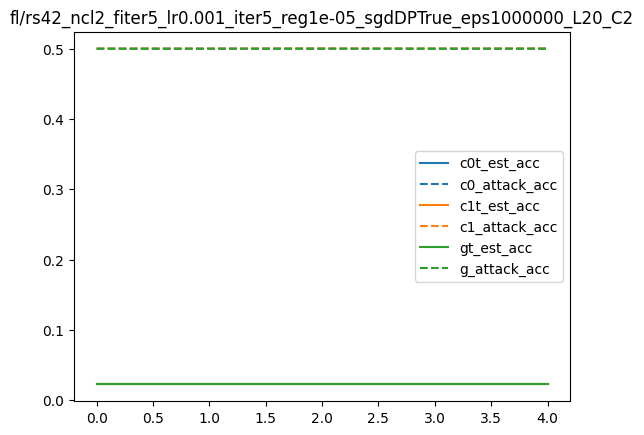

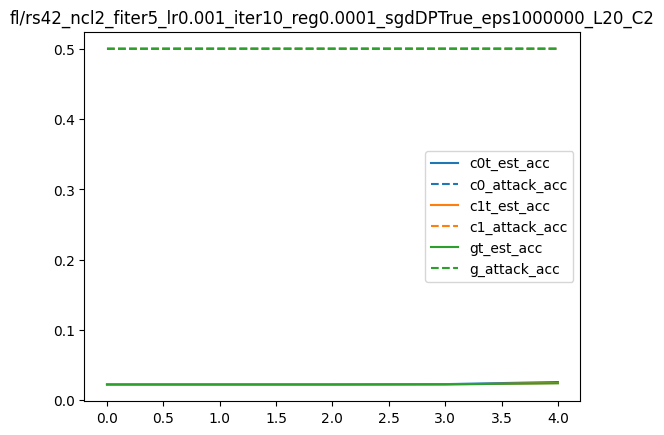

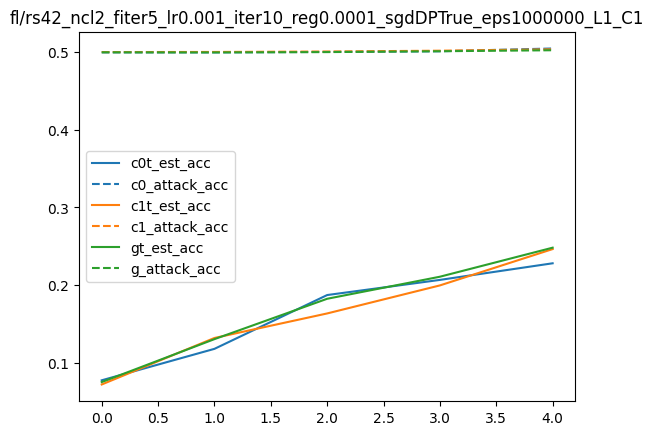

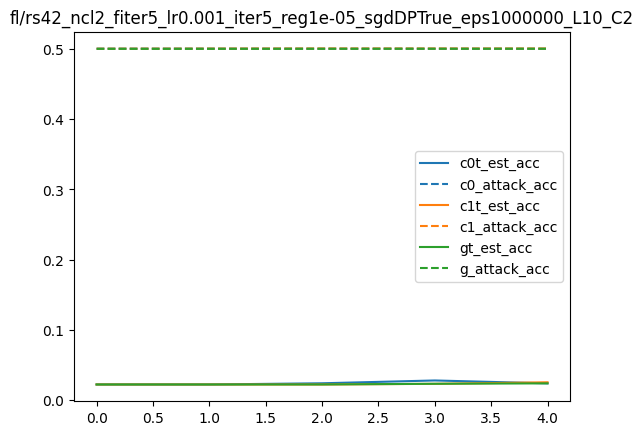

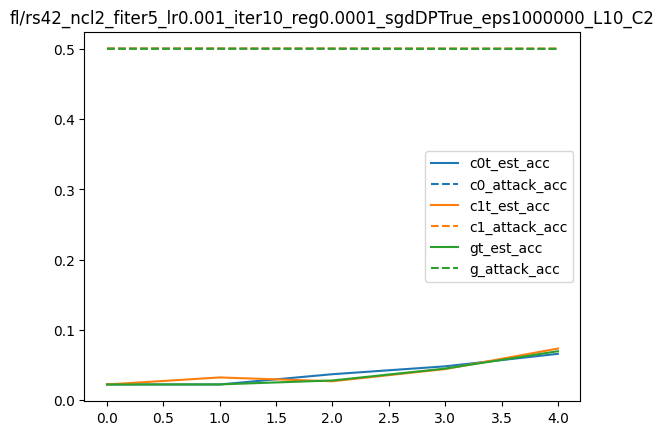

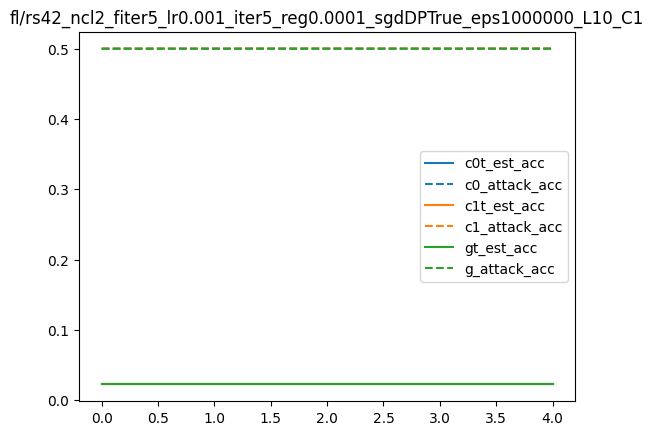

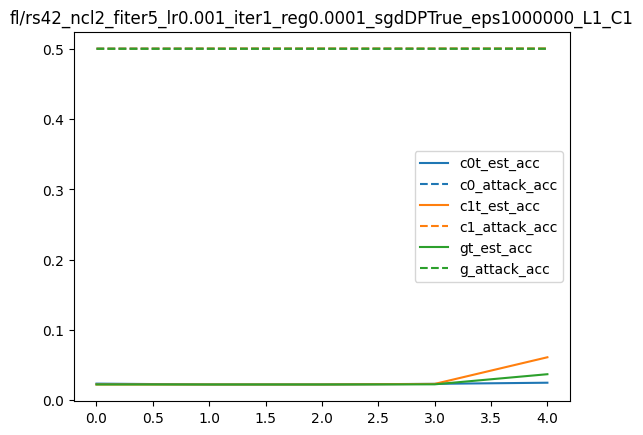

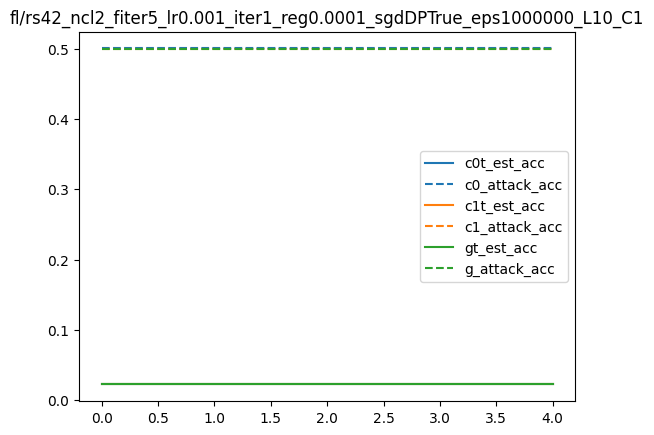

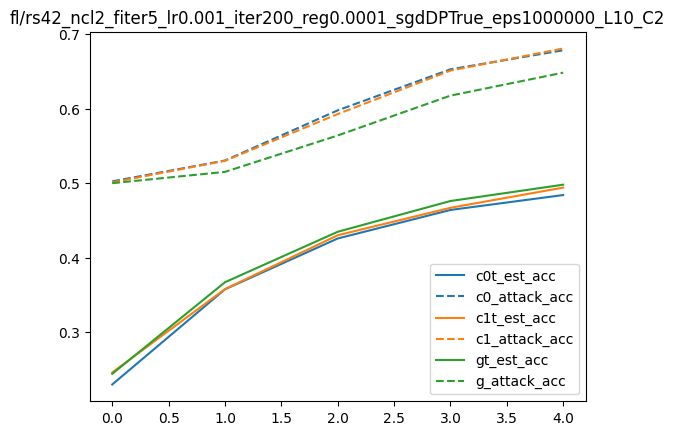

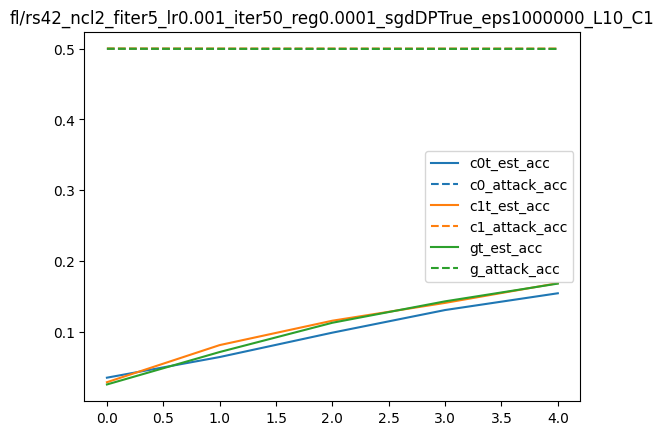

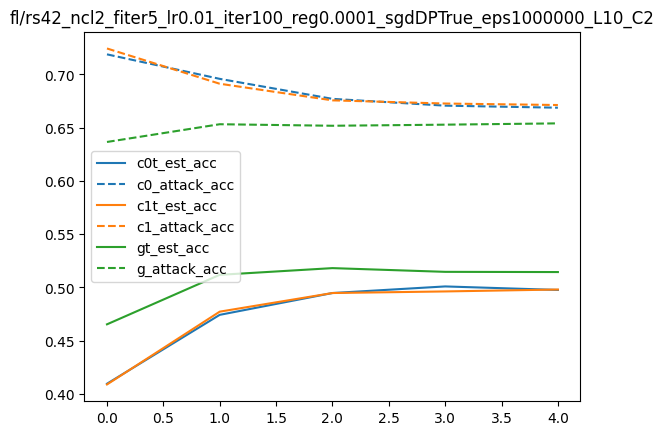

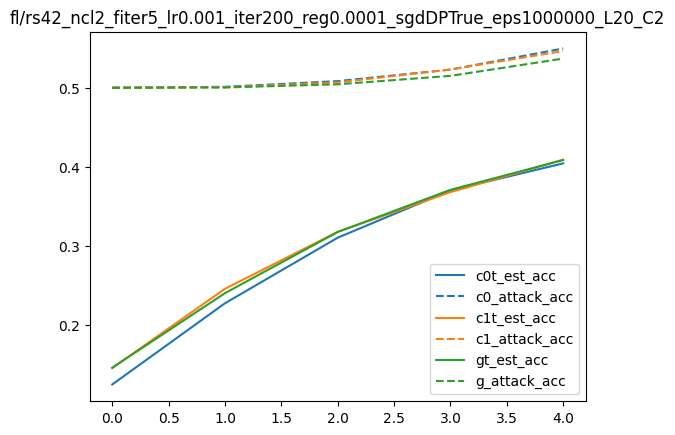

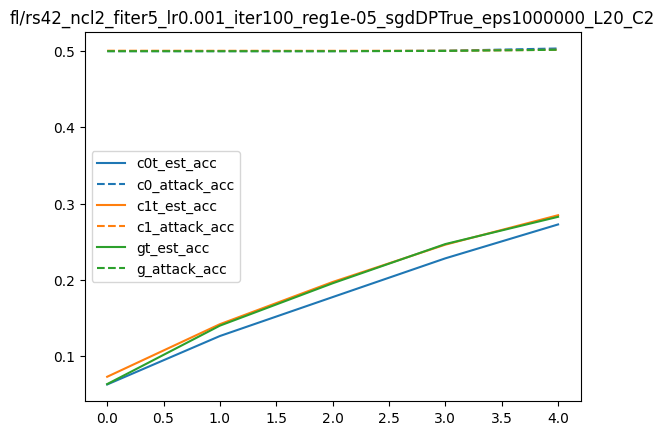

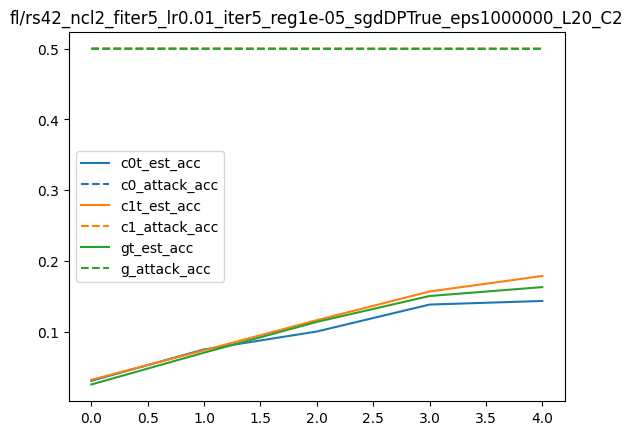

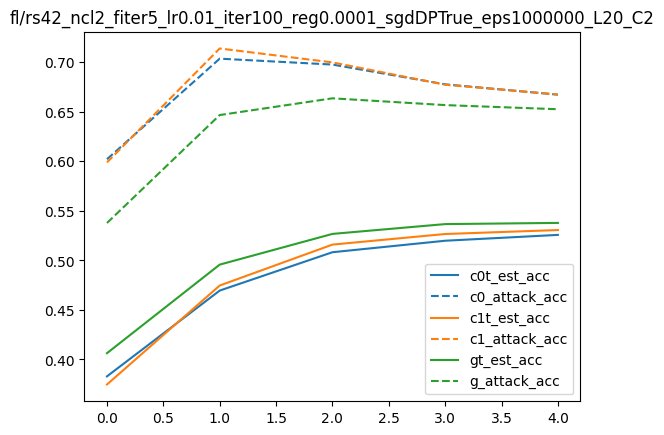

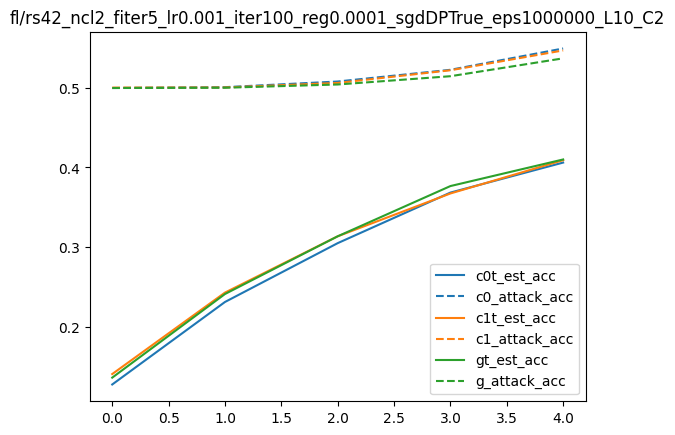

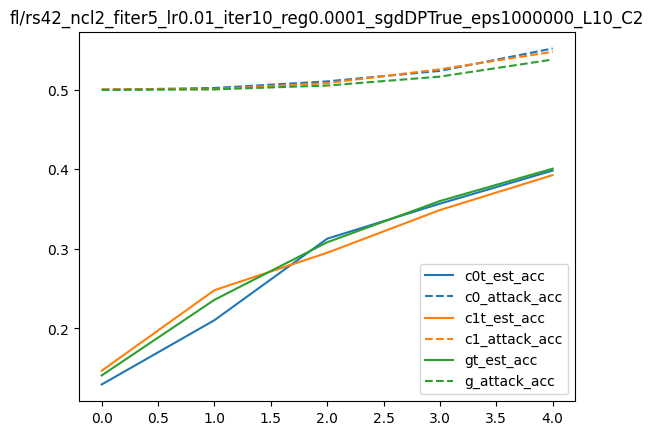

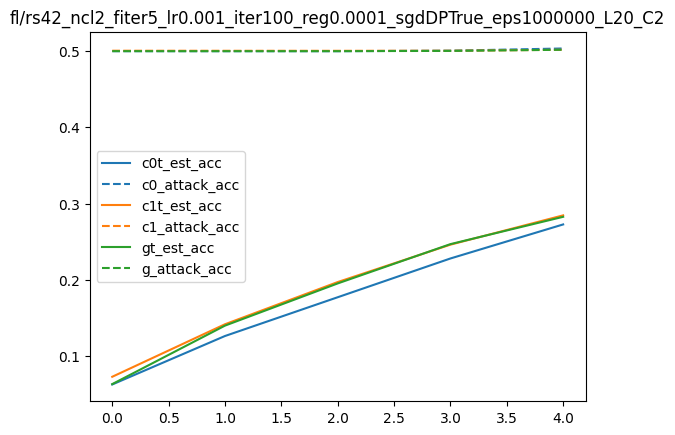

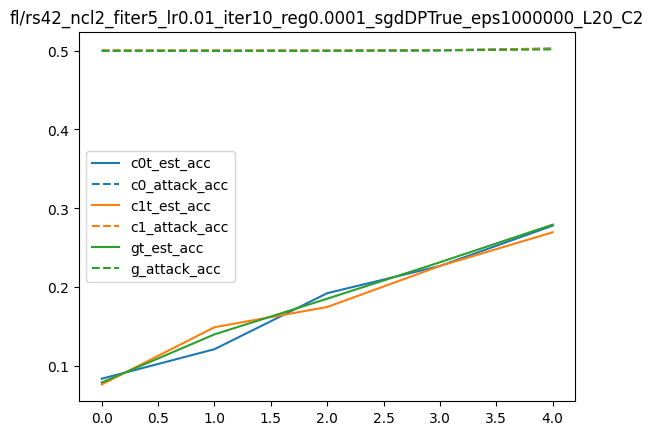

In [204]:
for i in results:
    if '_ncl2_' not in i:
        continue
    if 'DPTrue' not in i:
        continue
    
    m = max(results[i].loc[results[i]['client']=='g']['test_acc'])
    if m>0:
        print(i)
        print(m)
        clients = results[i]['client'].unique()
        iterations = results[i]['it'].unique()
        plt.figure()
        plt.title(i)
        for j,c in enumerate(clients):
    #         print(iterations)
            plt.plot([int(i) for i in iterations], results[i].loc[results[i]['client']==c]['test_acc'], label=c+'t_est_acc', color=colors[j])
            plt.plot([int(i) for i in iterations], results[i].loc[results[i]['client']==c]['attack_acc_mean'], '--', label=c+'_attack_acc', color=colors[j])
        plt.legend()
        name = i.replace('fl/', '')
#         plt.savefig(f'figures/fl/noDP/{name}.png')
#         results[i].to_csv(f'figures/fl/noDP/{name}.csv')

    #     break

fl/rs42_ncl2_fiter5_lr0.01_iter100_reg0.0001_outDPlocalTrue_eps10
test_acc: 0.0886
attack_acc: 14    0.512867
Name: attack_acc_mean, dtype: float64
fl/rs42_ncl2_fiter5_lr0.001_iter100_reg0.0001_outDPlocalTrue_eps10
test_acc: 0.1387
attack_acc: 14    0.521425
Name: attack_acc_mean, dtype: float64
fl/rs42_ncl2_fiter5_lr0.001_iter10_reg0.0001_outDPlocalTrue_eps10
test_acc: 0.0393
attack_acc: 14    0.499992
Name: attack_acc_mean, dtype: float64
fl/rs42_ncl2_fiter5_lr0.01_iter10_reg0.0001_outDPlocalTrue_eps10
test_acc: 0.1427
attack_acc: 14    0.522667
Name: attack_acc_mean, dtype: float64


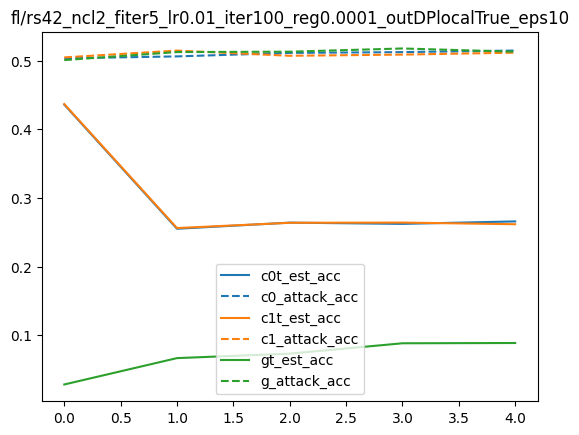

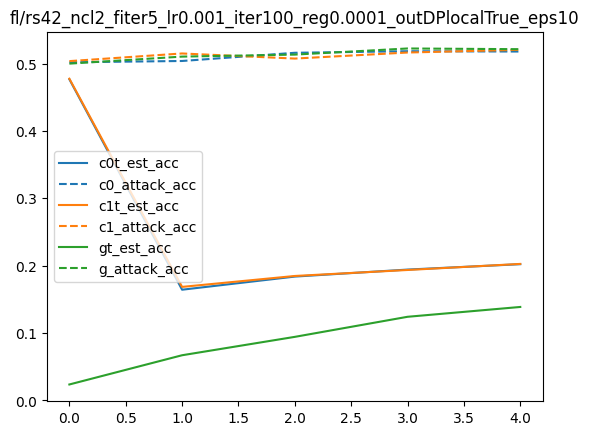

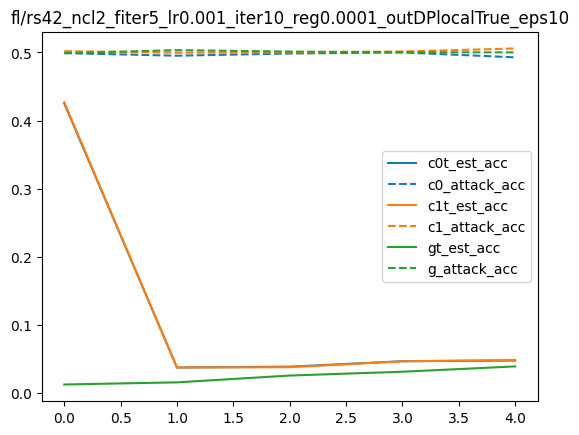

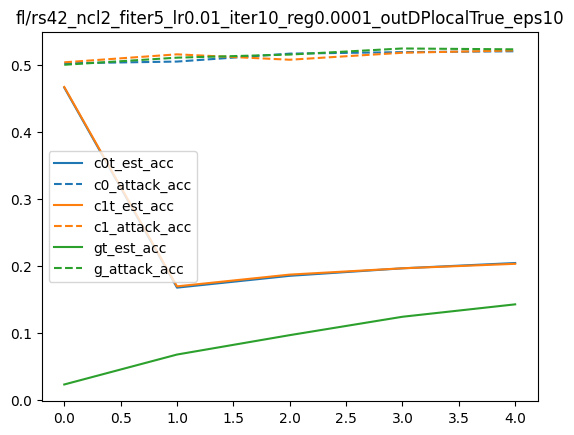

In [234]:
for i in results:
    i+='_'
    if '_ncl2_' not in i:
        continue
    if 'outDPlocalTrue' not in i or 'eps10_' not in i:
        continue
    i= i[:-1]
    m = max(results[i].loc[results[i]['client']=='g']['test_acc'])
    if m>0:
        print(i)
        print('test_acc:', m)
        am = results[i].loc[results[i]['client']=='g'].loc[results[i]['test_acc']==m]['attack_acc_mean']
        print('attack_acc:', am)

        clients = results[i]['client'].unique()
        iterations = results[i]['it'].unique()
        plt.figure()
        plt.title(i)
        for j,c in enumerate(clients):
    #         print(iterations)
            plt.plot([int(i) for i in iterations], results[i].loc[results[i]['client']==c]['test_acc'], label=c+'t_est_acc', color=colors[j])
            plt.plot([int(i) for i in iterations], results[i].loc[results[i]['client']==c]['attack_acc_mean'], '--', label=c+'_attack_acc', color=colors[j])
        plt.legend()
        name = i.replace('fl/', '')
#         plt.savefig(f'figures/fl/noDP/{name}.png')
#         results[i].to_csv(f'figures/fl/noDP/{name}.csv')

    #     break